In [ ]:
!git clone https://github.com/brofcb/YoutubeTranscriptGetter.git

In [ ]:
!pip install pytube3

In [ ]:
!pip install youtube-transcript-api

In [ ]:
!cd YoutubeTranscriptGetter;python3 ./YoutubeDataApi.py

In [ ]:
!pip install https://github.com/pyannote/pyannote-audio/tarball/develop

In [37]:
from pyannote.audio.features import RawAudio
from IPython.display import Audio
import json
project="./YoutubeTranscriptGetter"
video="joe_rogan_dwayne_the_rock_johnson_for_president_"
DEMO_FILE = {'audio': project+"/audio/"+video+".wav"}
with open(project+"/Json_scripts/"+video+".json") as f:
  script = json.load(f)

In [38]:
script[0]

{'duration': 4.859,
 'start': 0.75,
 'text': 'the joggin experienced in the past when'}

In [ ]:
import torch
pipeline = torch.hub.load('pyannote/pyannote-audio', 'dia')
diarization = pipeline(DEMO_FILE)

That's it? Yes, that's it :-)

In [47]:

for i in range(len(script)):
  start = script[i]["start"]
  end = start + script[i]["duration"]

  for label in diarization.labels():
    timeLine=diarization.label_timeline(label)
    for seg in timeLine.support_iter():
      if seg.start > start and seg.start < end:
        if "speaker" in script[i].keys():
          script[i]["speaker"].add(label)
        else:
          script[i]["speaker"] = {label}
script
#print(diarization)

[{'duration': 4.859,
  'speaker': {'B'},
  'start': 0.75,
  'text': 'the joggin experienced in the past when'},
 {'duration': 4.74,
  'speaker': {'B'},
  'start': 3.449,
  'text': "there's been disputes or things have"},
 {'duration': 7.351,
  'speaker': {'B'},
  'start': 5.609,
  'text': "been wrong it seems like there's a clear"},
 {'duration': 6.45,
  'speaker': {'B'},
  'start': 8.189,
  'text': 'path to to sort of work things out it'},
 {'duration': 3.899,
  'speaker': {'B'},
  'start': 12.96,
  'text': "doesn't seem like a clear path"},
 {'duration': 3.751,
  'speaker': {'B'},
  'start': 14.639,
  'text': 'it seems like every day kind of gets a'},
 {'duration': 3.481,
  'speaker': {'B'},
  'start': 16.859,
  'text': 'little worse like people get ramped up'},
 {'duration': 4.799,
  'speaker': {'B'},
  'start': 18.39,
  'text': "even more and then there's this event"},
 {'duration': 6.179,
  'speaker': {'B'},
  'start': 20.34,
  'text': "that's looming on the horizon this"},
 {'dur

# Evaluation with `pyannote.metrics`

Because groundtruth is available, we can evaluate the quality of the diarization pipeline by computing the [diarization error rate](http://pyannote.github.io/pyannote-metrics/reference.html#diarization).

In [ ]:
from pyannote.metrics.diarization import DiarizationErrorRate
metric = DiarizationErrorRate()
der = metric(groundtruth, diarization)

In [ ]:
print(f'diarization error rate = {100 * der:.1f}%')

diarization error rate = 42.9%


This implementation of diarization error rate is brought to you by [`pyannote.metrics`](http://pyannote.github.io/pyannote-metrics/).

It can also be used to improve visualization by find the optimal one-to-one mapping between groundtruth and hypothesized speakers.

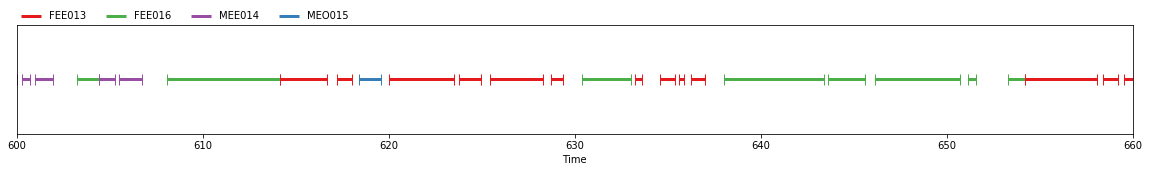

In [ ]:
mapping = metric.optimal_mapping(groundtruth, diarization)
diarization.rename_labels(mapping=mapping)

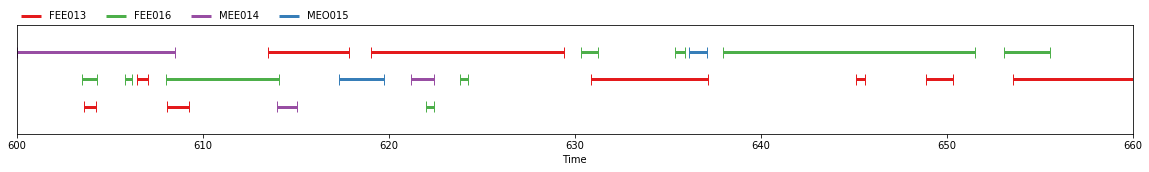

In [ ]:
groundtruth

# Going further 

We have only scratched the surface in this introduction. 

More details about `pyannote.audio` can be found in the [paper](https://arxiv.org/abs/1911.01255), while tutorials (for training or fine-tuning models on your own data) are available on the [`pyannote.audio` Github repository](https://github.com/pyannote/pyannote-audio).


## Teaser: overlap detection

It can even do overlapped speech detection (which would definitely come very handy for this messy meeting conversation)

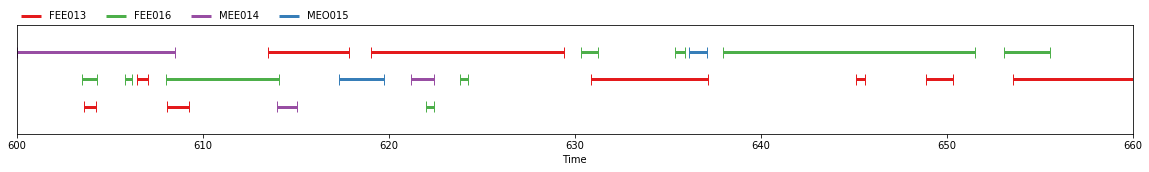

In [ ]:
groundtruth

Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


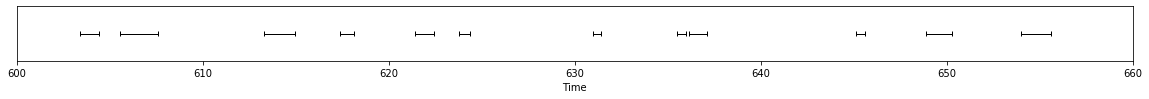

In [ ]:
overlap_detection = torch.hub.load('pyannote/pyannote-audio', 'ovl_ami', pipeline=True)
overlap_detection(DEMO_FILE).get_timeline()